<a href="https://colab.research.google.com/github/jayakhan/power-analysis/blob/main/power_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###### Do not change code ######

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from statsmodels.stats.power import TTestIndPower
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

def calculate_sample_size(p0, delta, alpha=0.05, power=0.80):
  z_alpha = stats.norm.ppf(1-alpha/2)
  z_beta = stats.norm.ppf(power)

  p1 = p0 * (1-delta)
  pooled_prob = (p0 + p1)/2

  n = (2* (z_alpha + z_beta)**2 * pooled_prob  * (1 - pooled_prob)) / (delta * p0) ** 2
  return n

def calculate_mlds(p0, daily_samples, weeks, alpha=0.05, power=0.80):
  lifts = []
  for week in weeks:
    days_needed = week * 7
    total_samples = days_needed * daily_samples
    sample_size_per_group = total_samples / 2

    delta = 0.0001
    step = 0.0001
    while True:
      needed_samples = calculate_sample_size(p0, delta, alpha, power)
      if needed_samples <= sample_size_per_group:
        lifts.append(delta * 100)
        break
      delta += step
  return lifts

def calculate_mlds_days(p0, daily_samples, days, alpha=0.05, power=0.80):
  lifts = []
  for day in days:
    total_samples = day * daily_samples
    sample_size_per_group = total_samples / 2

    delta = 0.0001
    step = 0.0001
    while True:
      needed_samples = calculate_sample_size(p0, delta, alpha, power)
      if needed_samples <= sample_size_per_group:
        lifts.append(delta * 100)
        break
      delta += step
  return lifts

###### Do not change code ######


<ipython-input-2-6a4f0af37e32>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Please update **baseline_conversion** with the **engagement/conversion rate** of the primary KPI, and **daily_samples** with **daily visits** data.

In [6]:
baseline_conversion = 0.04 # Example: 0.10 for 10% baseline conversion rate
daily_samples = 4000 # Daily Samples Data

# **Priori Power Analysis - How long to run an AB test? By Weeks**


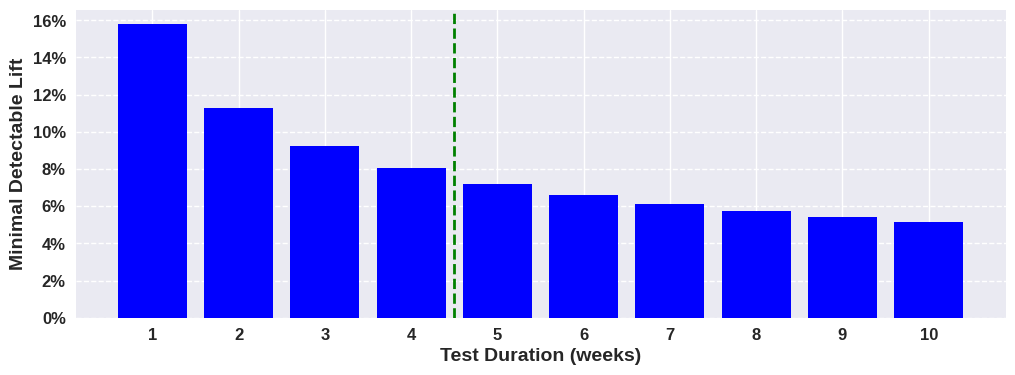

In [7]:
weeks = [1,2,3,4,5,6,7,8,9,10]
mdls = calculate_mlds(baseline_conversion, daily_samples, weeks)
plt.figure(figsize=(12,4))
plt.bar(weeks, mdls, color='darkblue')
plt.xlabel('Test Duration (weeks)', fontsize=14, fontweight='bold')
plt.ylabel('Minimal Detectable Lift', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.xticks(weeks, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')  # Formatter for y-axis labels
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))  # Set formatter for y-axis labels

plt.axvline(4.5, color='green', linestyle='--', linewidth=2, label='Threshold')

plt.show()

# **Priori Power Analysis - How long to run an AB test? By Days**


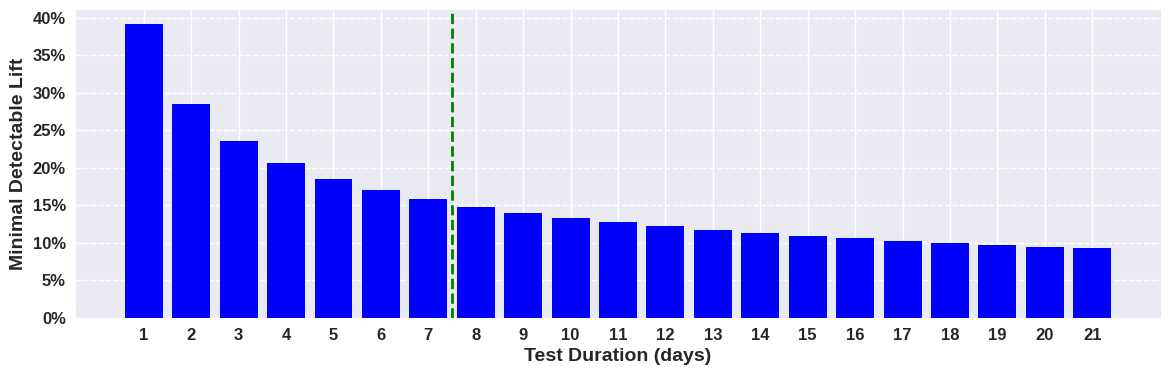

In [8]:
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
mdls = calculate_mlds_days(baseline_conversion, daily_samples, days)
plt.figure(figsize=(14,4))
plt.bar(days, mdls, color='darkblue')
plt.xlabel('Test Duration (days)', fontsize=14, fontweight='bold')
plt.ylabel('Minimal Detectable Lift', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.xticks(days, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')  # Formatter for y-axis labels
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))  # Set formatter for y-axis labels

plt.axvline(7.5, color='green', linestyle='--', linewidth=2, label='Threshold')

plt.show()